<a href="https://colab.research.google.com/github/arleswasb/projeto_PP_14/blob/main/projeto_PP_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados carregados com sucesso:
   tamanho_bytes  tempo_ms
0              8  0.003652
1            128  0.001519
2            512  0.002352
3           1024  0.001934
4           4096  0.002956

Gráfico 'latencia_vs_tamanho.png' foi salvo com sucesso.


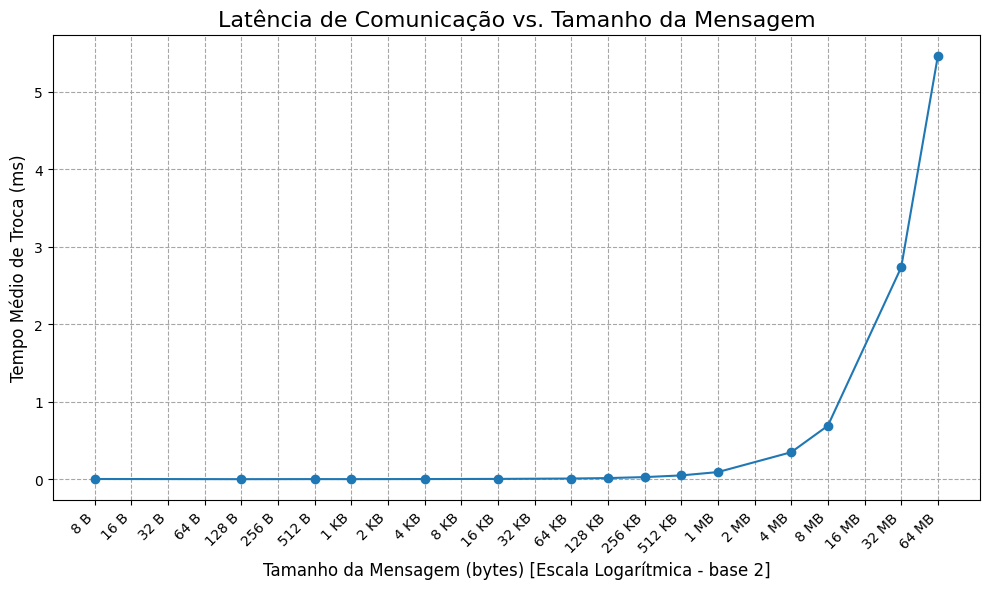

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Dados de latência (tamanho em bytes, tempo em ms)
# O formato é simples: "tamanho,tempo"
data = """8,0.003652
128,0.001519
512,0.002352
1024,0.001934
4096,0.002956
16384,0.004891
65536,0.009735
131072,0.015493
262144,0.028064
524288,0.049801
1048576,0.092993
4194304,0.349075
8388608,0.691078
33554432,2.733743
67108864,5.459805


"""

# Usar o pandas para ler os dados diretamente da string
# io.StringIO trata a string como se fosse um arquivo
df = pd.read_csv(io.StringIO(data), header=None, names=['tamanho_bytes', 'tempo_ms'])

# Opcional: Imprimir o início do DataFrame para verificar se foi lido corretamente
print("Dados carregados com sucesso:")
print(df.head())

# --- Código de plotagem ---

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df['tamanho_bytes'], df['tempo_ms'], marker='o', linestyle='-')
plt.xscale('log', base=2) # Usar escala logarítmica na base 2 para o eixo X
plt.grid(True, which="both", ls="--", color='0.65')

# Adicionar títulos e rótulos
plt.title('Latência de Comunicação vs. Tamanho da Mensagem', fontsize=16)
plt.xlabel('Tamanho da Mensagem (bytes) [Escala Logarítmica - base 2]', fontsize=12)
plt.ylabel('Tempo Médio de Troca (ms)', fontsize=12)

# Melhorar os marcadores do eixo X para mostrar tamanhos comuns (KB, MB)
ticks = [2**i for i in range(3, 27) if 2**i <= df['tamanho_bytes'].max()]
labels = [f'{t // 1024} KB' if t >= 1024 and t < 1024**2 else f'{t // 1024**2} MB' if t >= 1024**2 else f'{t} B' for t in ticks]
plt.xticks(ticks, labels, rotation=45, ha="right")


# Salvar o gráfico
plt.tight_layout()
plt.savefig('latencia_vs_tamanho.png')

print("\nGráfico 'latencia_vs_tamanho.png' foi salvo com sucesso.")